In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
h1b = pd.read_pickle("../data/hb1_2m_without_csharp.pkl")
h1b

,Dice_job_title,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,Job_Title,relatedSkills
0,.Net Application Developer,VCA INC,.NET APPLICATION DEVELOPER,"80,000","SILVER SPRING, MD",11/24/2014,11/28/2014,.Net Application Developer,Microsoft technologies;Software development;C#...
1,.Net Application Developer,OPTUM SERVICES INC,.NET APPLICATION DEVELOPER,"83,158","GOLDEN VALLEY, MN",12/10/2014,12/29/2014,.Net Application Developer,Microsoft technologies;Software development;C#...
2,.Net Application Developer,LCG INC,.NET APPLICATION DEVELOPER,"89,669","ARLINGTON, VA",12/30/2014,01/12/2015,.Net Application Developer,Microsoft technologies;Software development;C#...
3,.Net Application Developer,VCA INC,.NET APPLICATION DEVELOPER,"80,000","SILVER SPRING, MD",11/24/2014,11/28/2014,.Net Application Developer,Microsoft technologies;Software development;C#...
4,.Net Application Developer,OPTUM SERVICES INC,.NET APPLICATION DEVELOPER,"83,158","GOLDEN VALLEY, MN",12/10/2014,12/29/2014,.Net Application Developer,Microsoft technologies;Software development;C#...
...,...,...,...,...,...,...,...,...,...
2495074,webMethods Developer,LG CNS AMERICA INC,WEBMETHODS DEVELOPER,"106,960","ENGLEWOOD CLIFFS, NJ",10/05/2020,10/20/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...
2495075,webMethods Developer,GENERAL MILLS INC,WEBMETHODS DEVELOPER,"115,500","MINNEAPOLIS, MN",09/15/2020,10/05/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...
2495076,webMethods Developer,SRINSOFT INC,WEBMETHODS DEVELOPER,"130,000","RICHMOND, VA",07/02/2020,07/27/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...
2495077,webMethods Developer,SPARTAN SOLUTIONS INC,WEBMETHODS DEVELOPER,"131,726","SAN JOSE, CA",06/01/2020,06/11/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...


In [35]:
h1b_test = h1b.drop_duplicates().dropna()

In [4]:
# print(h1b.describe(include='all').to_latex())

In [32]:
# #moronic code
# for i, row in h1b_test.iterrows():
#     row['Month'] = row['START DATE'].split('/')[0]
#     row['Date'] = row['START DATE'].split('/')[1]
#     row['Year'] = row['START DATE'].split('/')[2]

In [36]:
h1b_test[["start_day", "start_month", "start_year"]] = h1b_test["START DATE"].str.split("/", expand = True)


In [39]:
h1b_test

,Dice_job_title,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,Job_Title,relatedSkills,start_day,start_month,start_year,state
0,.Net Application Developer,VCA INC,.NET APPLICATION DEVELOPER,"80,000","SILVER SPRING, MD",11/24/2014,11/28/2014,.Net Application Developer,Microsoft technologies;Software development;C#...,11,28,2014,MD
1,.Net Application Developer,OPTUM SERVICES INC,.NET APPLICATION DEVELOPER,"83,158","GOLDEN VALLEY, MN",12/10/2014,12/29/2014,.Net Application Developer,Microsoft technologies;Software development;C#...,12,29,2014,MN
2,.Net Application Developer,LCG INC,.NET APPLICATION DEVELOPER,"89,669","ARLINGTON, VA",12/30/2014,01/12/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,01,12,2015,VA
6,.Net Application Developer,MULTITEK SYSTEMS & DESIGN INCORPORATED,.NET APPLICATION DEVELOPER,"42,000","DEER PARK, NY",03/14/2015,09/12/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,09,12,2015,NY
7,.Net Application Developer,CNET GLOBAL SOLUTIONS INC,.NET APPLICATION DEVELOPER,"60,600","WATERTOWN, MA",08/26/2015,09/04/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,09,04,2015,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495074,webMethods Developer,LG CNS AMERICA INC,WEBMETHODS DEVELOPER,"106,960","ENGLEWOOD CLIFFS, NJ",10/05/2020,10/20/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,10,20,2020,NJ
2495075,webMethods Developer,GENERAL MILLS INC,WEBMETHODS DEVELOPER,"115,500","MINNEAPOLIS, MN",09/15/2020,10/05/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,10,05,2020,MN
2495076,webMethods Developer,SRINSOFT INC,WEBMETHODS DEVELOPER,"130,000","RICHMOND, VA",07/02/2020,07/27/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,07,27,2020,VA
2495077,webMethods Developer,SPARTAN SOLUTIONS INC,WEBMETHODS DEVELOPER,"131,726","SAN JOSE, CA",06/01/2020,06/11/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,06,11,2020,CA


In [38]:
h1b_test['state'] = h1b_test["LOCATION"].str[-2:]


In [6]:
column_name  = h1b_test.columns.values.tolist()
column_name.remove("Dice_job_title")

In [7]:
column_name

['EMPLOYER',
 'JOB TITLE',
 'BASE SALARY',
 'LOCATION',
 'SUBMIT DATE',
 'START DATE',
 'Job_Title',
 'relatedSkills',
 'start_day',
 'start_month',
 'start_year']

In [8]:
# h1b_test.groupby(column_name)["Dice_job_title"].count()

In [31]:
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [30]:
h1b_test.state.unique()

array(['MD', 'MN', 'VA', 'NY', 'MA', 'KY', 'IL', 'CA', 'GA', 'NJ', 'NC',
       'TX', 'WA', 'CT', 'KS', 'MI', 'WI', 'RI', 'IN', 'NE', 'AZ', 'FL',
       'CO', 'DC', 'SC', 'PA', 'OH', 'NV', 'MO', 'TN', 'IA', 'AL', 'UT',
       'ME', 'ID', 'ND', 'OR', 'AR', 'OK', 'NH', 'DE', 'MS', 'VT', 'LA',
       'MT', 'NM', 'SD', 'WV', 'HI', 'PR', 'RG', 'EO', 'GU', 'MP', 'WY',
       'PW', 'AK', 'VI', ', ', 'MH', 'TY', 'NG', 'IS'], dtype=object)

In [94]:
h1b_clean = h1b_test[h1b_test['state'].isin(states)]
h1b_clean

,Dice_job_title,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,Job_Title,relatedSkills,start_day,start_month,start_year,state
0,.Net Application Developer,VCA INC,.NET APPLICATION DEVELOPER,"80,000","SILVER SPRING, MD",11/24/2014,11/28/2014,.Net Application Developer,Microsoft technologies;Software development;C#...,11,28,2014,MD
1,.Net Application Developer,OPTUM SERVICES INC,.NET APPLICATION DEVELOPER,"83,158","GOLDEN VALLEY, MN",12/10/2014,12/29/2014,.Net Application Developer,Microsoft technologies;Software development;C#...,12,29,2014,MN
2,.Net Application Developer,LCG INC,.NET APPLICATION DEVELOPER,"89,669","ARLINGTON, VA",12/30/2014,01/12/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,01,12,2015,VA
6,.Net Application Developer,MULTITEK SYSTEMS & DESIGN INCORPORATED,.NET APPLICATION DEVELOPER,"42,000","DEER PARK, NY",03/14/2015,09/12/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,09,12,2015,NY
7,.Net Application Developer,CNET GLOBAL SOLUTIONS INC,.NET APPLICATION DEVELOPER,"60,600","WATERTOWN, MA",08/26/2015,09/04/2015,.Net Application Developer,Microsoft technologies;Software development;C#...,09,04,2015,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495074,webMethods Developer,LG CNS AMERICA INC,WEBMETHODS DEVELOPER,"106,960","ENGLEWOOD CLIFFS, NJ",10/05/2020,10/20/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,10,20,2020,NJ
2495075,webMethods Developer,GENERAL MILLS INC,WEBMETHODS DEVELOPER,"115,500","MINNEAPOLIS, MN",09/15/2020,10/05/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,10,05,2020,MN
2495076,webMethods Developer,SRINSOFT INC,WEBMETHODS DEVELOPER,"130,000","RICHMOND, VA",07/02/2020,07/27/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,07,27,2020,VA
2495077,webMethods Developer,SPARTAN SOLUTIONS INC,WEBMETHODS DEVELOPER,"131,726","SAN JOSE, CA",06/01/2020,06/11/2020,webMethods Developer,Web services;JDBC;Java;Quality assurance;webMe...,06,11,2020,CA


In [95]:
# by year, by state, by employers=== functions
h1b_clean["BASE SALARY"] = h1b_clean["BASE SALARY"].str.replace(',', '').astype(int)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [96]:
# h1b_clean.to_pickle('../data/h1b_clean.pkl')
h1b_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602711 entries, 0 to 2495078
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Dice_job_title  602711 non-null  object
 1   EMPLOYER        602711 non-null  object
 2   JOB TITLE       602711 non-null  object
 3   BASE SALARY     602711 non-null  int64 
 4   LOCATION        602711 non-null  object
 5   SUBMIT DATE     602711 non-null  object
 6   START DATE      602711 non-null  object
 7   Job_Title       602711 non-null  object
 8   relatedSkills   602711 non-null  object
 9   start_day       602711 non-null  object
 10  start_month     602711 non-null  object
 11  start_year      602711 non-null  object
 12  state           602711 non-null  object
dtypes: int64(1), object(12)
memory usage: 64.4+ MB


In [97]:
h1b_co = h1b_clean[h1b_clean['state'] == 'CO']

In [59]:
# h1b_clean.Dice_job_title.value_counts()[h1b_clean.Dice_job_title.unique()]
# h1b_co.Dice_job_title.unique()

# some basic plots

In [123]:
h1b_co.groupby('Dice_job_title')['BASE SALARY'].agg(count='size', mean_sent='mean').reset_index().sort_values(by=['count'],ascending=False)


,Dice_job_title,count,mean_sent
388,Systems Analyst,343,74812.064140
304,Research Associate,299,58092.214047
193,Lead Engineer,280,77673.342857
280,Project Manager,272,89973.488971
95,Developer,250,78019.688000
...,...,...,...
56,Cloud Systems Engineer,1,76032.000000
290,Qlikview Developer,1,90000.000000
292,Quality Control Manager,1,82000.000000
53,Cloud Architect,1,106059.000000


<AxesSubplot:title={'center':'BASE SALARY'}, xlabel='Dice_job_title'>

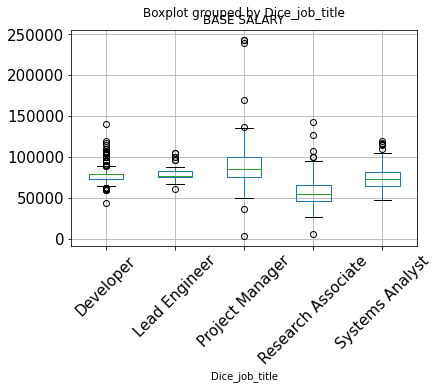

In [127]:
h1b_co[h1b_co['Dice_job_title'].isin(['Systems Analyst','Research Associate','Lead Engineer',
                                      'Project Manager','Developer'])].boxplot(
    rot=45, fontsize=15,
    by  ='Dice_job_title', column=["BASE SALARY"])


### too many data

In [9]:
# profile = ProfileReport(h1b_test, n_freq_table_max=250, title="Pandas Profiling Report")

In [55]:
# profile.to_widgets()


In [56]:
# profile.to_file("h1b_unique_report.html")

## appriori

In [23]:
from mlxtend.preprocessing import TransactionEncoder

In [6]:
tech_skill  = pd.read_csv('../TechandGrayAreaJobTitles_relatedSkills.csv')

In [61]:
tech_skill['skill_list'] = tech_skill.relatedSkills.str.split(';')

In [62]:
dataset = tech_skill.skill_list.dropna().tolist() 

In [65]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,.NET,2D computer graphics,3D computer graphics,3D modeling,3D printing,A+,ACSA,ADA,ADF,ADP,...,Xilinx,YouTube,Zemax,e-Pro,iOS development,jBPM,jQuery,scikit-learn,webMethods,z/OS
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1229,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1230,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1231,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [71]:
from mlxtend.frequent_patterns import fpmax
fpmax(df[1:10], min_support=0.4, use_colnames=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.444444,"(C#, Software development, ASP.NET, .NET)"


## hirerical clustering 

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
tech_skill

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Job_Title,relatedSkills,skill_list
0,.Net Application Developer,Microsoft technologies;Software development;C#...,"[Microsoft technologies, Software development,..."
1,.Net Architect,Software development;C#;Microsoft Windows Azur...,"[Software development, C#, Microsoft Windows A..."
2,.Net Developer,Software development;C#;ASP.NET;.NET;Microsoft...,"[Software development, C#, ASP.NET, .NET, Micr..."
3,.Net Lead,SQL;IBM WebSphere;Java;C#;API;Microsoft SSIS;A...,"[SQL, IBM WebSphere, Java, C#, API, Microsoft ..."
4,.Net SDET,NaN,NaN
...,...,...,...
1462,Workstation PC Technician,Computer networking;Microsoft Windows 7;Softwa...,"[Computer networking, Microsoft Windows 7, Sof..."
1463,Writer Editor,Analytics;IT consulting;Strategy;Security clea...,"[Analytics, IT consulting, Strategy, Security ..."
1464,iOS Architect,Software development;Interfaces;Computer scien...,"[Software development, Interfaces, Computer sc..."
1465,iOS Developer,Software development;RESTful;Quality assurance...,"[Software development, RESTful, Quality assura..."


In [81]:
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(tech_skill.Job_Title, method='ward'))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/abulitibu.tuguluke/Library/Python/3.8/lib/python/site-packages/scipy/cluster/hierarchy.py:2841: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


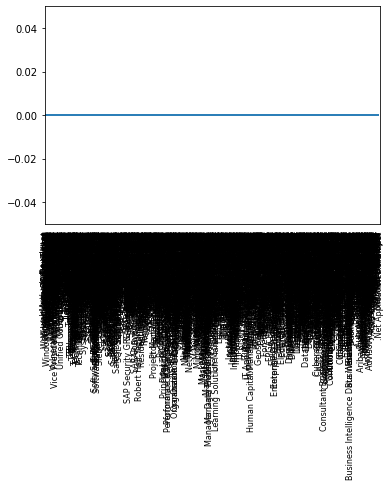

In [80]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 
# Data set
df = tech_skill[['Job_Title']]
df = df.set_index('Job_Title')
 
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Plot with Custom leaves
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df.index)

# Show the graph
plt.show()

# knowledge graph